In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(10,5)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\Abhishek\Downloads\CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


Text(0, 0.5, 'Sales')

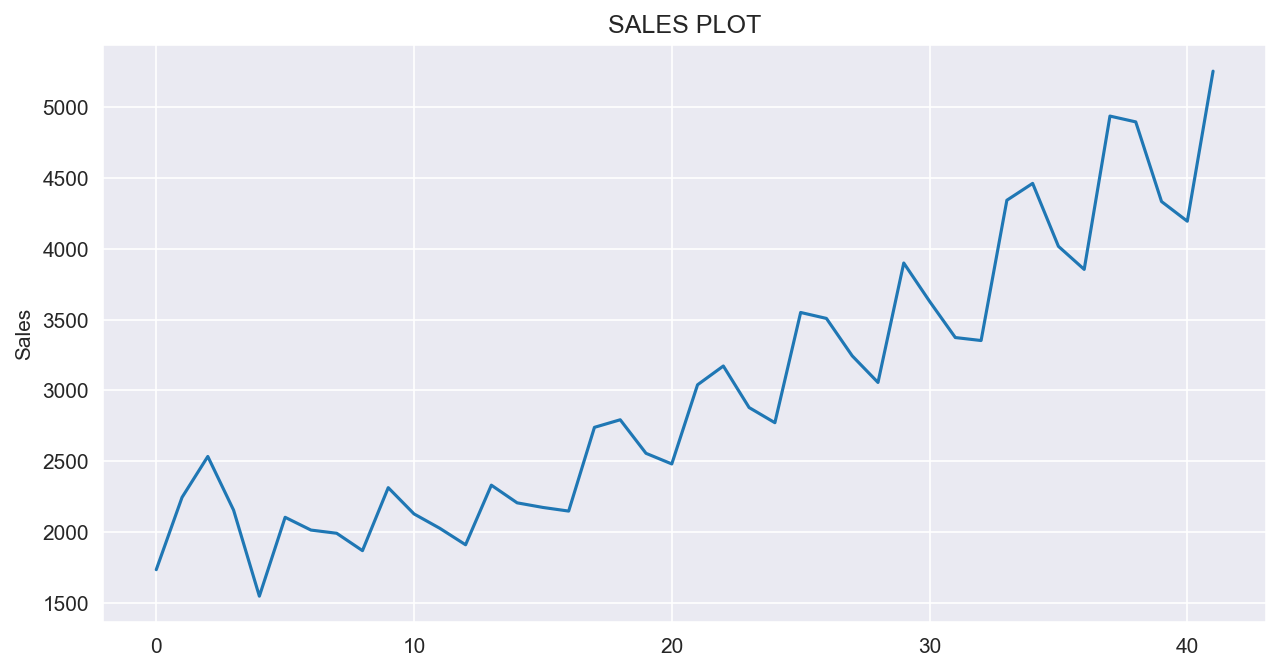

In [5]:
plt.plot(df['Sales'])
plt.title('SALES PLOT')
plt.ylabel('Sales')

In [6]:
quarters = ['Q1','Q2','Q3','Q4']
n = df['Quarter'][0]
n[0:2]

'Q1'

In [7]:
df['quarter'] = 0
for i in range(42):
    n = df['Quarter'][i]
    df['quarter'][i] = n[0:2]
df    

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [8]:
dummy = pd.DataFrame(pd.get_dummies(df['quarter']))
dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [9]:
df = pd.concat([df,dummy],axis=1)
df.head(5)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [10]:
df['t'] = np.arange(1,43)

df['t_squared'] = df['t']*df['t']

df['log_sales'] = np.log(df['Sales'])

Text(0, 0.5, 'Autocorrelation (r2 value)')

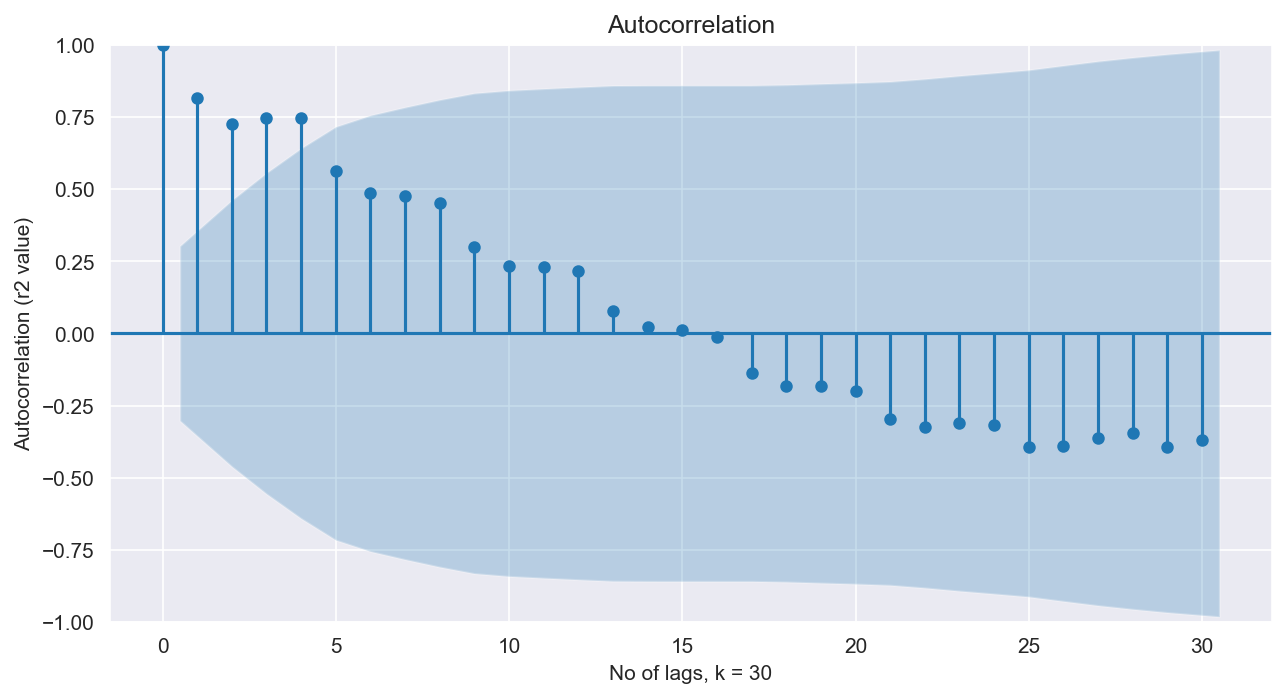

In [11]:
plot_acf(df['Sales'], lags = 30)                                              
plt.xlabel("No of lags, k = 30")
plt.ylabel("Autocorrelation (r2 value)")

In [12]:
train=df.head(30)
test=df.tail(12)

In [13]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error 

In [14]:
# Linear model
from sklearn.metrics import mean_squared_error

lm = smf.ols('Sales~t',data=train).fit()
pred_lm = pd.Series(lm.predict(test['t']))
rmse_lm =  np.sqrt(mean_squared_error(test['Sales'],pred_lm))
rmse_lm

714.0144483281297

In [15]:
# Exponential Model
em = smf.ols('log_sales~t',data=train).fit()
pred_em = pd.Series(em.predict(test['t']))
rmse_em = np.sqrt(mean_squared_error(test['Sales'],pred_em))
rmse_em

4252.188990972336

In [16]:
# Quadratic Model
qm = smf.ols('Sales~t+t_squared',data=train).fit()
pred_qm = pd.Series(qm.predict(test[["t", "t_squared"]]))
rmse_qm = np.sqrt(mean_squared_error(test['Sales'],pred_qm))
rmse_qm

646.2715428311323

In [17]:
# Additive Seasonality
a_s = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_as = pd.Series(a_s.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_as = np.sqrt(mean_squared_error(test['Sales'],pred_as))
rmse_as

1778.0065467941376

In [18]:
# Additive Seasonality Quadratic
asq = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_asq = asq.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']])
rmse_asq = np.sqrt(mean_squared_error(test['Sales'],pred_asq))
rmse_asq

586.0533067871024

In [19]:
# Multiplicative Seasonality
ms = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_ms = ms.predict(test)
rmse_ms = np.sqrt(mean_squared_error(test['Sales'],pred_ms))
rmse_ms

4252.638677789394

In [20]:
# Multiplicative Additive Seasonality
mas = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mas = mas.predict(test)
rmse_mas = np.sqrt(mean_squared_error(test['Sales'],pred_mas))
rmse_mas

4252.638677789394

In [24]:
data = {"Model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"])
        ,"Rmse_Value":pd.Series([rmse_lm,rmse_em,rmse_qm,rmse_as,rmse_asq,rmse_ms,rmse_mas])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['Rmse_Value'])

,Model,Rmse_Value
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
1,rmse_Exp,4252.188991
5,rmse_Mult_sea,4252.638678
6,rmse_Mult_add_sea,4252.638678
